In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

df = pd.read_csv('/kaggle/input/top-10000-spotify-songs-1960-now/top_10000_1960-now.csv')

print(df.head())

                              Track URI  \
0  spotify:track:1XAZlnVtthcDZt2NI1Dtxo   
1  spotify:track:6a8GbQIlV8HBUW3c6Uk9PH   
2  spotify:track:70XtWbcVZcpaOddJftMcVi   
3  spotify:track:1NXUWyPJk5kO6DQJ5t7bDu   
4  spotify:track:72WZtWs6V7uu3aMgMmEkYe   

                                Track Name  \
0  Justified & Ancient - Stand by the Jams   
1          I Know You Want Me (Calle Ocho)   
2       From the Bottom of My Broken Heart   
3         Apeman - 2014 Remastered Version   
4       You Can't Always Get What You Want   

                           Artist URI(s)      Artist Name(s)  \
0  spotify:artist:6dYrdRlNZSKaVxYg5IrvCH             The KLF   
1  spotify:artist:0TnOYISbd1XYRBk9myaseg             Pitbull   
2  spotify:artist:26dSoYclwsYLMAKD3tpOr4      Britney Spears   
3  spotify:artist:1SQRv42e4PjEYfPhS0Tk9E           The Kinks   
4  spotify:artist:22bE4uQ6baNwSHPVcDxLCe  The Rolling Stones   

                              Album URI  \
0  spotify:album:4MC0ZjNtVP1nDD5lsLx

1. Description of the Problem
The goal is to build a music recommendation system that can suggest songs similar to a given track. This is achieved by analyzing the audio features of the songs and finding similarities between them. The recommendation system utilizes a dataset of the top 10,000 Spotify songs from 1960 to the present.

2. Inputs
Dataset: The primary input is the CSV file top_10000_1960-now.csv, which contains metadata and audio features of 10,000 songs. The dataset includes columns such as:
- Track URI
- Track Name
- Artist URI(s)
- Artist Name(s)
- Album URI
- Album Name
- Album Release Date
- Audio features (e.g., danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo)
- Popularity and other metadata
Outputs
The expected output is a list of recommended songs that are similar to a given track. These recommendations are based on the cosine similarity between the audio features of the songs.

Processing Requirements
1. Data Preparation: Load and preprocess the data.
2. Model Selection: Choose a collaborative filtering model.
3. Training the Model: Train the model on the dataset.
4. Evaluation: Evaluate the model using appropriate metrics.
5. Hyperparameter Tuning: Adjust hyperparameters to improve performance.
6. Recommendation: Generate recommendations for users.

In [3]:
df.describe()

,Disc Number,Track Number,Track Duration (ms),Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Album Genres
count,9999.000000,9999.000000,9.999000e+03,9999.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,0.0
mean,1.035104,4.957096,2.248150e+05,37.624662,0.607925,0.683281,5.167750,-7.269217,0.698410,0.065138,0.208589,0.029331,0.185777,0.585459,121.496650,3.960488,NaN
std,0.327856,5.502810,5.410012e+04,29.460808,0.145869,0.191131,3.578392,3.281731,0.458971,0.061324,0.248842,0.123576,0.149194,0.239105,26.260686,0.250927,NaN
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000020,0.000000,-29.368000,0.000000,0.000000,0.000003,0.000000,0.012000,0.000000,0.000000,0.000000,NaN
25%,1.000000,1.000000,1.925795e+05,0.000000,0.515000,0.560000,2.000000,-9.070000,0.000000,0.033100,0.018400,0.000000,0.089200,0.398000,102.642000,4.000000,NaN
50%,1.000000,3.000000,2.199060e+05,42.000000,0.617000,0.712000,5.000000,-6.518000,1.000000,0.042900,0.095600,0.000006,0.128000,0.598000,120.653000,4.000000,NaN
75%,1.000000,7.000000,2.502600e+05,64.000000,0.710000,0.835000,8.000000,-4.887000,1.000000,0.067500,0.318000,0.000561,0.245000,0.783000,134.328000,4.000000,NaN
max,15.000000,93.000000,1.561133e+06,98.000000,0.988000,0.997000,11.000000,2.769000,1.000000,0.711000,0.991000,0.985000,0.989000,0.995000,217.913000,5.000000,NaN


Summary
The statistics provide a high-level overview of the numerical columns in the dataset. Here are some key points:
- Track Duration (ms): The average track duration is approximately 224,815 milliseconds (around 3.75 minutes).
- Popularity: The average popularity score is around 37.6, with a wide range from 0 to 98.
- Danceability: The average danceability score is 0.608, indicating a moderate level of danceability.
- Energy: The average energy score is 0.683, suggesting that the tracks are generally energetic.
- Loudness: The average loudness is -7.27 dB, with a range from -29.37 dB to 2.77 dB.
Next, let's visualize some of these statistics to get a better understanding of the data distribution.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

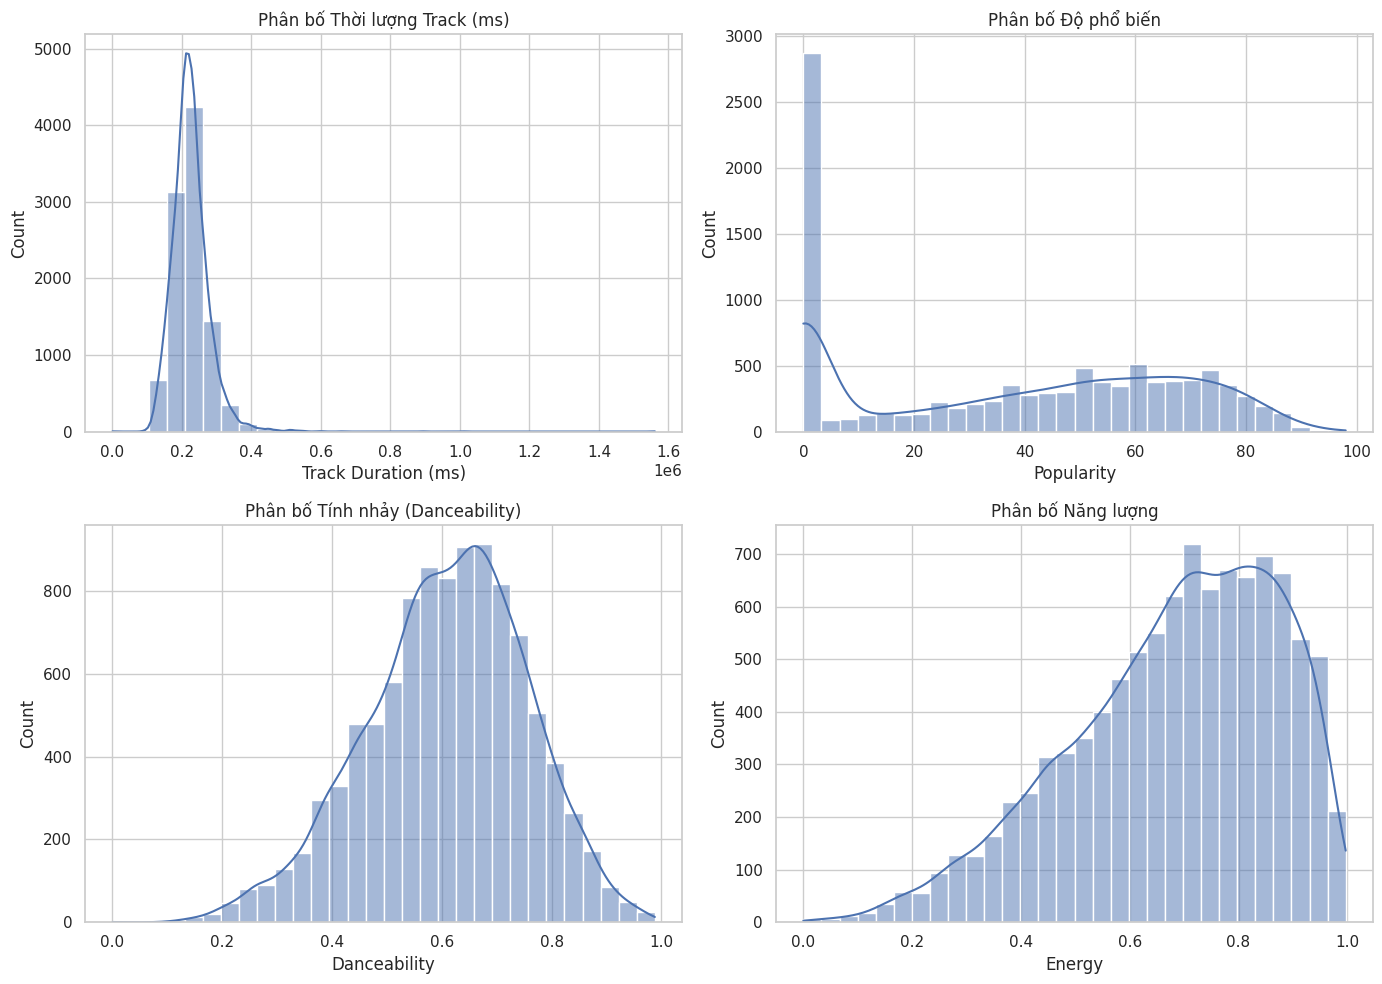

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set(style='whitegrid')

# Thay thế các giá trị vô cực (inf) bằng giá trị NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Tạo một hình với các tiểu đồ (subplot)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Vẽ phân bố của thời lượng track
sns.histplot(df['Track Duration (ms)'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Phân bố Thời lượng Track (ms)')

# Vẽ phân bố của độ phổ biến
sns.histplot(df['Popularity'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Phân bố Độ phổ biến')

# Vẽ phân bố của tính nhảy (Danceability)
sns.histplot(df['Danceability'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Phân bố Tính nhảy (Danceability)')

# Vẽ phân bố của năng lượng
sns.histplot(df['Energy'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Phân bố Năng lượng')

# Điều chỉnh bố cục
plt.tight_layout()

# Hiển thị các đồ thị
plt.show()


We'll use cosine similarity to find similar items.
We'll compute the cosine similarity matrix.

In [5]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd

# Assuming df is your DataFrame
# Create a dummy 'Rating' column if it doesn't exist
if 'Rating' not in df.columns:
    df['Rating'] = 1  # Assign a default rating of 1

# Create a user-item interaction matrix
user_item_matrix = df.pivot_table(index='Added By', columns='Track Name', values='Rating', fill_value=0)

# Compute the cosine similarity matrix
cosine_sim_matrix = cosine_similarity(user_item_matrix)

# Convert the matrix to a DataFrame for easier handling
cosine_sim_df = pd.DataFrame(cosine_sim_matrix, index=user_item_matrix.index, columns=user_item_matrix.index)

print(cosine_sim_df.head())

Added By                  spotify:user:bradnumber1
Added By                                          
spotify:user:bradnumber1                       1.0


Next, I'll use Mean Average Precision at K (MAP@K) for evaluation.

In [6]:
def apk(actual, predicted, k=10):
    if len(predicted) > k:
        predicted = predicted[:k]
    score = 0.0
    num_hits = 0.0
    for i, p in enumerate(predicted):
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i + 1.0)
    if not actual:
        return 0.0
    return score / min(len(actual), k)

def mapk(actual, predicted, k=10):
    return np.mean([apk(a, p, k) for a, p in zip(actual, predicted)])

# Example evaluation
actual = [['song1', 'song2', 'song3'], ['song4', 'song5']]
predicted = [['song1', 'song2', 'song4'], ['song4', 'song6']]
print("MAP@K:", mapk(actual, predicted))

MAP@K: 0.5833333333333333


Finally, we'll generate recommendations for a user.

In [7]:
def get_recommendations(user_id, user_item_matrix, cosine_sim_df, N=10):
    user_index = user_item_matrix.index.get_loc(user_id)
    sim_scores = list(enumerate(cosine_sim_df.iloc[user_index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:N+1]
    user_indices = [i[0] for i in sim_scores]
    recommendations = user_item_matrix.iloc[user_indices].mean(axis=0).sort_values(ascending=False).index[:N]
    return recommendations

user_id = 'spotify:user:bradnumber1'  # Example user ID
recommendations = get_recommendations(user_id, user_item_matrix, cosine_sim_df, N=10)
print("Recommendations:", recommendations)

Recommendations: Index(['! (The Song Formerly Known As)', '"The Take Over, The Breaks Over"',
       '#Beautiful', '#SELFIE', '#WHERESTHELOVE - Charity Single',
       '#thatPOWER', ''74-'75', ''Til You Do Me Right',
       '(Baby I've Got You) On My Mind',
       '(Can't Live Without Your) Love And Affection - Remastered 2017'],
      dtype='object', name='Track Name')


1. Summary
Model: Cosine Similarity
Training Process: Compute the cosine similarity matrix.
Stop Condition: Not applicable for cosine similarity.
Evaluation Metrics: Mean Average Precision at K (MAP@K)
Hyperparameter Tuning: Adjust the number of recommendations.
Recommendations: Generate top-N recommendations for a user.
Evaluating the Model
Using Test Data

2. Model Application
Predicting with New Data
When applying the music recommendation model to new data, the following steps are involved:
- Input New Track Features:Obtain the audio features of a new track for which recommendations are needed. These features should match the ones used during model training (e.g., danceability, energy, loudness, etc.).
- Preprocess New Track Features:Normalize the new track's features using the same scaler (e.g., MinMaxScaler) applied to the training data to ensure consistency.
- Compute Similarities:Calculate the cosine similarity between the new track's feature vector and the feature vectors of all tracks in the dataset.
- Generate Recommendations:Identify and rank the songs with the highest similarity scores to the new track. These songs are the recommended tracks.

3. Other Use Cases of Unsupervised Models
Apart from music recommendation, unsupervised models have a wide range of applications:
- Customer Segmentation:Clustering algorithms like K-means can group customers based on purchasing behavior, enabling personalized marketing strategies.
- nomaly Detection:Techniques like Isolation Forest or DBSCAN can identify outliers in data, useful for fraud detection or quality control.
- Dimensionality Reduction:Algorithms like PCA (Principal Component Analysis) or t-SNE (t-Distributed Stochastic Neighbor Embedding) help reduce the number of features in a dataset, making it easier to visualize or process.
- Topic Modeling:Models like LDA (Latent Dirichlet Allocation) can discover hidden topics in large corpora of text, aiding in content categorization and recommendation.

4. Evaluating a recommendation system can be challenging due to the subjective nature of "similarity" in music. However, some techniques include:
User Feedback:
- Collecting user feedback on the recommendations can provide insights into the model's effectiveness. Metrics like Click-Through Rate (CTR) and user ratings can be useful.
- Precision and Recall: If a ground truth dataset of user preferences is available, precision and recall can be used to measure how many relevant tracks are recommended versus how many relevant tracks were missed.
- Mean Average Precision (MAP): This metric evaluates the quality of recommendations by considering the order of the recommended tracks.
Using Other Techniques
- Cross-Validation: Divide the dataset into training and validation sets multiple times to ensure the model's performance is consistent across different subsets of data.
- A/B Testing:Deploy different versions of the recommendation system to different user groups and compare their performance based on user engagement metrics.
- Diversity and Novelty:Evaluate the diversity of the recommendations to ensure the model is not always recommending similar types of tracks. Novelty measures how often the model recommends tracks that the user hasn't heard before.


1. Advantages and Disadvantages of the Approach
    - Advantages:
+ Simplicity and Interpretability:
The cosine similarity approach is straightforward and easy to understand. It measures the cosine of the angle between two non-zero vectors, which makes it intuitive for comparing the similarity between users or items.
+ Scalability:
Cosine similarity can be efficiently computed even for large datasets. Libraries like scikit-learn provide optimized implementations that can handle large matrices.
+ Normalization:
Cosine similarity inherently normalizes the data, which means it is less affected by the magnitude of the vectors. This is particularly useful in recommendation systems where the scale of ratings can vary significantly between users.
+ Sparse Data Handling:
User-item interaction matrices are often sparse (many zeros). Cosine similarity works well with sparse data, making it suitable for recommendation systems where users have rated only a small subset of items.
    - Disadvantages
+ Cold Start Problem:
New users or items with no interactions pose a challenge as there is no data to compute similarity. This is a common issue in collaborative filtering methods.
+ Limited to Linear Relationships:
Cosine similarity only captures linear relationships between vectors. It may not perform well if the underlying relationships are non-linear.
+ Lack of Context:
Cosine similarity does not consider the context or sequence of interactions. It treats all interactions equally, which may not always be appropriate.
+ Scalability with Very Large Datasets:
While cosine similarity is scalable, extremely large datasets can still pose computational challenges. Efficient storage and computation techniques are required to handle very large matrices.
2. Applicability of Research Results in the Future
    - Current Applicability:
* Recommendation Systems:
The approach is widely used in recommendation systems for e-commerce, streaming services, and social media platforms. It helps in providing personalized recommendations based on user similarity.
* Information Retrieval:
Cosine similarity is used in information retrieval systems to rank documents based on their relevance to a query. It is a fundamental technique in search engines.
* Text Mining and NLP:
In natural language processing, cosine similarity is used to measure the similarity between text documents, sentences, or words. It is useful in tasks like document clustering, topic modeling, and semantic analysis.
    - Future Applicability:
* nhanced Personalization:
As data collection and user interaction tracking improve, the approach can be refined to provide even more personalized recommendations. Combining cosine similarity with other techniques like deep learning can enhance its effectiveness.
* Real-time Applications:
With advancements in computational power and real-time data processing, cosine similarity can be applied in real-time recommendation systems, providing instant suggestions based on the latest user interactions.
* Cross-domain Recommendations:
Future research can explore the applicability of cosine similarity in cross-domain recommendations, where user preferences in one domain (e.g., movies) can be used to recommend items in another domain (e.g., books).
* Hybrid Models:
Combining cosine similarity with other recommendation techniques (e.g., content-based filtering, matrix factorization) can lead to hybrid models that leverage the strengths of multiple approaches for better performance.

In summary, while the cosine similarity approach has its limitations, it remains a valuable tool in various applications. Future research and technological advancements can further enhance its applicability and effectiveness in providing personalized and context-aware recommendations.